Imports y configuraciones de ambiente

In [1]:
import torch
import torch.optim as optim
import numpy as np
import random
import numpy as np
import gymnasium

Checkeo de devices

In [2]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Running on {DEVICE}")
print("Cuda Available:", torch.cuda.is_available())

Running on cuda:0
Cuda Available: True


Setting de seeds

In [3]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

Validacion del ambiente

In [4]:
ENV_NAME = "MountainCar-v0"

env = gymnasium.make(ENV_NAME, render_mode="rgb_array")

print("Actions #",env.action_space)
print(env.observation_space.shape)
env.reset()
next_state, reward, terminated, truncated, info = env.step(action=0)

print(f"{next_state.shape},\n {reward},\n {terminated},\n {info}")

Actions # Discrete(3)
(2,)
(2,),
 -1.0,
 False,
 {}


e:\Downloads\Programs\conda\envs\TorchImage\lib\site-packages\gymnasium\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4
MEMORY_SIZE = 10000

In [6]:
n_actions = env.action_space.n
# Get the number of state observations
state, info = env.reset()
n_observations = len(state)

In [7]:
from agent import Agent

env = gymnasium.make(ENV_NAME)
agent = Agent(env, DEVICE, n_observations, n_actions, EPS_START, 
              EPS_END, EPS_DECAY, GAMMA, BATCH_SIZE, MEMORY_SIZE)

In [8]:
optimizer = optim.AdamW(agent.policy_net.parameters(), lr=LR, amsgrad=True)

In [9]:
episode_durations = agent.train(num_episodes=200, TAU=TAU, optimizer=optimizer)

100%|██████████| 1000/1000 [18:46<00:00,  1.13s/it]


<Figure size 640x480 with 0 Axes>

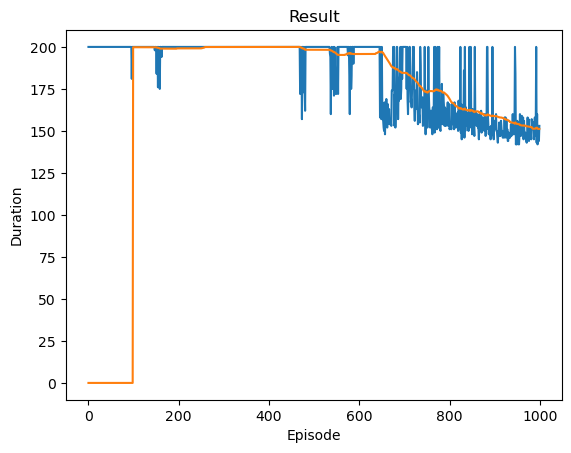

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
agent.plot_durations(episode_durations, True)